# Titanic Survival Prediction

### Import Packages

In [1]:
##General Packages##
import pandas as pd
import numpy as np
import os as os
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

##Scikit Packages##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Import Training and Test set

In [3]:
Titanic_train = pd.read_csv("train.csv")
Titanic_test = pd.read_csv("test.csv")

In [4]:
Titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Exploratory analysis and Visualization

In [5]:
list(Titanic_train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

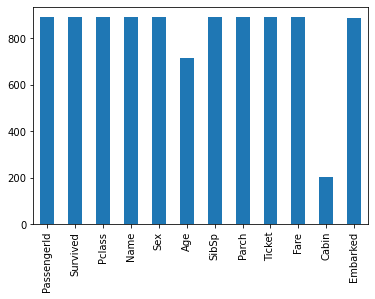

In [6]:
# counts
Titanic_train.count().plot(kind='bar')
plt.show()

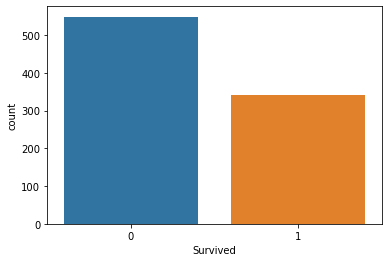

In [7]:
# target field patterns
sns.countplot(data =Titanic_train,x="Survived")
plt.show()

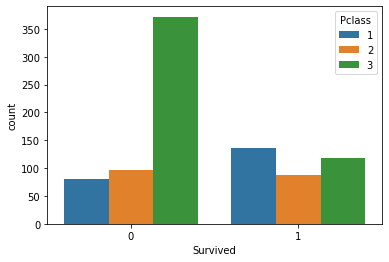

In [8]:
sns.countplot(data =Titanic_train,x="Survived",hue='Pclass')
plt.show()

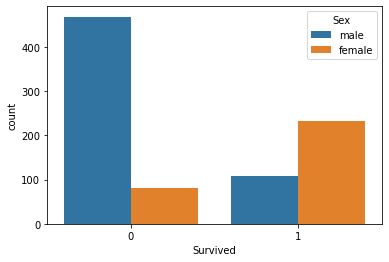

In [9]:
sns.countplot(data =Titanic_train,x="Survived",hue='Sex')
plt.show()

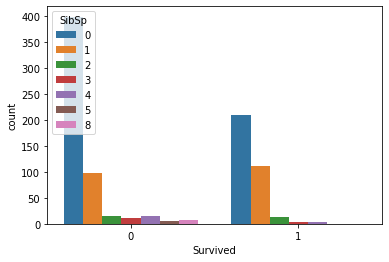

In [10]:
sns.countplot(data =Titanic_train,x="Survived",hue='SibSp')
plt.show()

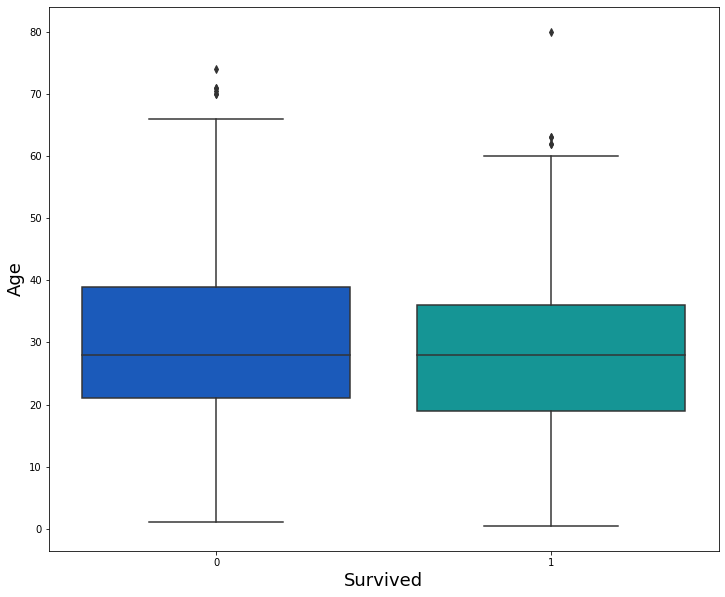

In [11]:
plt.figure(figsize=(12, 10))
plt.xlabel("Survived",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Survived',y='Age',data=Titanic_train,palette='winter')
plt.show()

### Data Inspection and Data Wrangling

    1. drop unwanted fields (text, ids and not contributing to the model).
    2. impute nulls in age with median.
    3. impute nulls in embarked with mode.
    4. create dummy variables to discrete features.

In [12]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# drop text columns that do not provide value to the model
Titanic_train.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
Titanic_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [14]:
Titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
# handle nulls 
Titanic_train['Age'].fillna(Titanic_train['Age'].dropna().median(),inplace=True)
Titanic_train['Embarked']=np.where(Titanic_train['Embarked'].isna(),'S',Titanic_train['Embarked'])

In [16]:
# create dummy variables to discrete fields
Titanic_train=pd.get_dummies(Titanic_train,columns=["Sex","Embarked"],drop_first=True)

In [17]:
Titanic_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


### Model Fit and Prediction

In [18]:
X = Titanic_train.drop(columns=["Survived"],axis=1)
Y = Titanic_train[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=123)

In [19]:
X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
329,1,16.0,0,1,57.9792,0,0,0
749,3,31.0,0,0,7.7500,1,1,0
203,3,45.5,0,0,7.2250,1,0,0
421,3,21.0,0,0,7.7333,1,1,0
97,1,23.0,0,1,63.3583,1,0,0


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Viswashanthi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Viswashanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)

In [23]:
print(cm)

[[94 20]
 [14 51]]


In [24]:
precision_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.7183098591549296, 0.8100558659217877)

In [25]:
print(classification_report(y_test, y_pred,target_names=['not survived', 'survived']))

              precision    recall  f1-score   support

not survived       0.87      0.82      0.85       114
    survived       0.72      0.78      0.75        65

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



In [26]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:5]

array([[0.24825151, 0.75174849],
       [0.873746  , 0.126254  ],
       [0.46008895, 0.53991105],
       [0.76329221, 0.23670779],
       [0.89976053, 0.10023947]])

In [27]:
def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

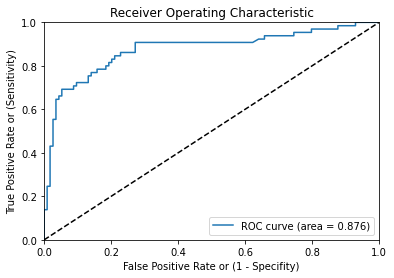

In [28]:
plot_roc_curve(y_test, y_pred_proba)

### Test the model

In [29]:
Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
Titanic_test_model = Titanic_test.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [31]:
Titanic_test_model['Age'].fillna(Titanic_test_model['Age'].dropna().median(),inplace=True)
Titanic_test_model['Fare'].fillna(Titanic_test_model['Fare'].dropna().mean(),inplace=True)
#Titanic_test['Embarked']=np.where(Titanic_test['Embarked'].isna(),'S',Titanic_test['Embarked'])

In [32]:
Titanic_test_model=pd.get_dummies(Titanic_test_model,columns=["Sex","Embarked"],drop_first=True)

In [33]:
Titanic_test_model.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


In [34]:
Titanic_test_pred = logreg.predict(Titanic_test_model)

In [35]:
Titanic_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [36]:
Titanic_test['Survived']=Titanic_test_pred

In [37]:
Titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
